# 📊 Regression Performance Metrics Demonstration

This notebook explains and demonstrates **performance metrics** for regression models using Python and scikit-learn.

**Definition:**

**A performance metric** is a **quantitative measure** used to **evaluate how well a machine learning model performs** — that is, how accurate or effective its predictions are compared to the actual values.

The choice of performance metric depends on the **type of problem — regression or classification**.

### Step 1: Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


### Step 2: Load a Sample Dataset
We'll use the **California Housing dataset** (available in scikit-learn) for demonstration.


In [4]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True)
df = data.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Step 3: Define Features and Target
Let's separate the **independent variables (X)** and **dependent variable (y)**.


In [5]:
X = df.drop(columns=["MedHouseVal"])   # Independent variables
y = df["MedHouseVal"]                  # Target variable

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 4: Train a Linear Regression Model
We’ll fit a multiple linear regression model on the training data.


In [6]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### Step 5: Calculate Performance Metrics
Now, let's evaluate our model using common regression performance metrics:
- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)
- R² Score


In [7]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)


Mean Absolute Error (MAE): 0.5332001304956555
Mean Squared Error (MSE): 0.5558915986952442
Root Mean Squared Error (RMSE): 0.7455813830127763
R² Score: 0.575787706032451


## ✅ Summary
- **MAE:** Measures average absolute error (easy to interpret).  
- **MSE:** Penalizes larger errors more.  
- **RMSE:** Same unit as target variable — gives a sense of typical prediction error.  
- **R² Score:** Explains how much variance in target is explained by the model (closer to 1 = better).


f:\clg\Data Science\1-Python\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


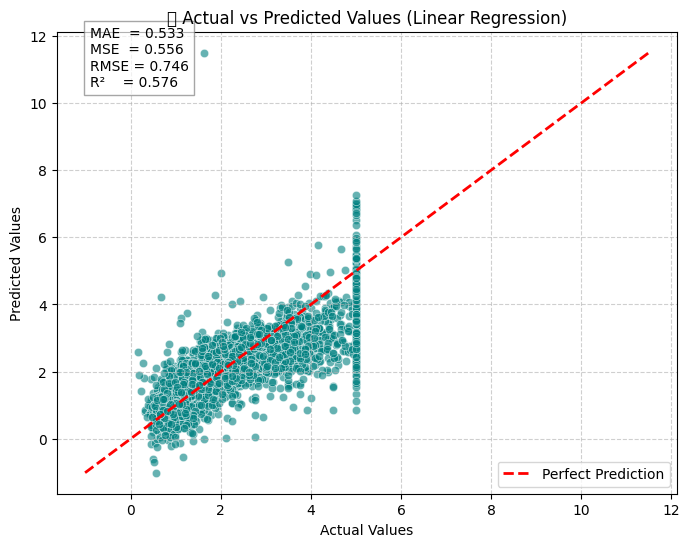

In [8]:
# Create scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='teal', edgecolor='white')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("📈 Actual vs Predicted Values (Linear Regression)")

# Add reference line (perfect prediction line)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')

# Annotate metrics on the plot
plt.text(min_val + 0.1, max_val - 1,
         f"MAE  = {mae:.3f}\nMSE  = {mse:.3f}\nRMSE = {rmse:.3f}\nR²    = {r2:.3f}",
         fontsize=10, color='black',
         bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))

plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()